# Probabilistic Classifier with Naive Bayes

## By Wilson Peguero Rosario

A Naive Bayes classifier is not a single algorithm but uses multiple machine learning algorithms to classify data. It not only uses probability, but it is simple to implement. Some real-world examples of its use include filtering spam, classifying documents, text analysis, or medical diagnosis.

To perform sentiment analysis using a Naive Bayes algorithm, complete the following:

1. Access the resources related to sentiment analysis, located in the topic Resources. Note: There are about 50 datasets that are suitable for use in a sentiment analysis task. For this part of the exercise, you must choose one of these datasets, provided it includes at least 10,000 instances.
2. Ensure that the datasets are suitable for classification using this method.
3. You may search for data in other repositories, such as Data.gov, Kaggle or Scikit Learn.

For your selected dataset, build a classification model as follows:

1. Explain the dataset and the type of information you wish to gain by applying a classification method.
2. Explain the Naive Bayes algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).
3. Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by applying a classification method using the Naïve Bayes.
6. Choose one of the Naive Bayes types of algorithms: Gaussian Naïve Bayes, Multinomial Naïve Bayes, or Bernoulli Naïve Bayes and explain your reasoning.
7. Split the data into dependent and independent variables (or features and labels).
8. Vectorize the text into numbers.
9. Train the Naive Bayes classifier on the training set.
10. Make classification predictions.
11. Interpret the results in the context of the questions you asked.
12. Validate your model using a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.
13. Include all mathematical formulas used and graphs representing the final outcomes.

Prepare a comprehensive technical report as a markdown document or Jupyter notebook, including all code, code comments, all outputs, plots, and analysis. Make sure the project documentation contains a) problem statement, b) algorithm of the solution, c) analysis of the findings, and d) deferences.

## Solution

### Problem Statement

Although Steam Reviews allows one to determine whether a game is good based on a user-based recommendation system, there is no guarantee that the users themselves are using the system appropriately. By using a data set containing prelabeled comments to determine whether the game review was positive or not will allow one to determine whether the review was positive. The data set utilized is based on Steam Reviews that are prelabeled as either recommended or not recommended. The features in use will be the year in which the comment was posted as well as the user suggestion to classify unlabeled reviews on certain titles. This algorithm will also use other factors related to the game itself (such as the publisher) to increase the accuracy of the SVM algorithm. This data set will allow Steam users to choose see the most popular titles and has the potential to show them which games had the most positive reviews based on the tags attached to the game title (i.e. the free to play game with the most positive reviews).

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk

df__texts = pd.read_csv('steam_reviews/train.csv')
df__game_info = pd.read_csv('steam_reviews/game_overview.csv')

df__steam_info = pd.merge(df__texts, df__game_info, on="title")

df__steam_info.head(10)

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


Now that we have the data set fully assembled one should be able to use some Exploratory analysis to see what features may supplement the explanatory variable that is the comments.

### Exploratory Analysis

Before we begin the actual exploratory analysis, one must first convert the title, publisher as well as the developer of the game into it's categorical code value to better represent the features

In [125]:
df__steam_info['title'] = pd.Categorical(df__steam_info['title'])
df__steam_info['developer'] = pd.Categorical(df__steam_info['developer'])
df__steam_info['publisher'] = pd.Categorical(df__steam_info['title'])

dict__cat = dict()
for (col, data) in df__steam_info.iteritems():
    ctype = df__steam_info[str(col)].dtype
    print(f'the feature {col} is of type {ctype}')
    if str(ctype) == 'category':
        dict__cat[str(col)] = dict(enumerate(df__steam_info[str(col)].cat.categories))
        df__steam_info[str(col)] = df__steam_info[str(col)].cat.codes


the feature review_id is of type int64
the feature title is of type category
the feature year is of type float64
the feature user_review is of type object
the feature user_suggestion is of type int64
the feature developer is of type category
the feature publisher is of type category
the feature tags is of type object
the feature overview is of type object


Now that we have replaced the explanatory variables with their respective categorical codes, now we can proceed to change the overview feature with the length of the overview itself rather than make the feature a categorical. After that we can create the 

In [126]:
df__steam_info['overview_length'] = df__steam_info['overview'].apply(
    lambda value:len(value)
    )

corr_matrix = df__steam_info.corr()
corr_matrix\
    .style\
        .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)\
            .format(precision=2)

,review_id,title,year,user_suggestion,developer,publisher,overview_length
review_id,1.00,-0.36,0.15,-0.16,-0.28,-0.36,0.14
title,-0.36,1.00,-0.16,-0.07,0.36,1.00,-0.03
year,0.15,-0.16,1.00,-0.12,-0.13,-0.16,-0.11
user_suggestion,-0.16,-0.07,-0.12,1.00,-0.06,-0.07,0.06
developer,-0.28,0.36,-0.13,-0.06,1.00,0.36,-0.09
publisher,-0.36,1.00,-0.16,-0.07,0.36,1.00,-0.03
overview_length,0.14,-0.03,-0.11,0.06,-0.09,-0.03,1.00


From what one can tell, it seems that there is no correlation at all between the features *title*, *developer*, and *publisher*. This indicates that the data set itself is not biased as it seems that there are not enough evidence to show that the data set has been influenced by any preference of a game developer or publisher.

In the end, using any other features may be detrimental to the model. Only the *user_suggestion* and the *user_review* features will be used for this occassion.

In [127]:
df = df__steam_info[
    ['review_id', 'user_suggestion', 'user_review']
    ]

### Data Processing

Now that we have determined what features to use for the sentimental analysis. Let's work on some feature engineering to maximize the use of the user-review feature for sentimental analysis.

*We first begin by removing all special characters, change all letters to lowercase, remove stopwords (such as the, is, in, for, where, etc.), and finally remove words with the same stems (i.e. dislike and like have the same stem which is like)*.

We do the above by creating functions and using the apply function to the feature in pandas.

In [128]:
def remove_special(text:str) -> str:
    rem = ''
    for i in text:
        if i.isalnum() == False and i != " ":
            text = text.replace(i, '')
    return text

df['user_review'] = df['user_review']\
    .apply(remove_special)

df.loc[0, 'user_review']

C:\Users\wpegu\AppData\Local\Temp/ipykernel_19804/932945142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_review'] = df['user_review']\


'Im scared and hearing creepy voices  So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean  Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd  I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door'

Now that the special characters have been removed, let's change all of the letters to lowercase.

In [129]:
df['user_review'] = df['user_review']\
    .apply(lambda text: text.lower())
df.loc[0, 'user_review']

C:\Users\wpegu\AppData\Local\Temp/ipykernel_19804/2888780994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_review'] = df['user_review']\


'im scared and hearing creepy voices  so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times  this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean  hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd  i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door'

As shown above, further improvement was done upon the data set. Now all that is needed is to remove any stopwords within the text of the entire data set.

In [130]:
nltk.download('stopwords')
nltk.download('punkt')
def remove_stopwords(text:str) -> list:
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df['user_review'] = df['user_review'].apply(remove_stopwords)
df.loc[0, 'user_review']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wpegu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wpegu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\wpegu\AppData\Local\Temp/ipykernel_19804/934998833.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_review'] = df['user_review'].apply(remove_stopwords)


['im',
 'scared',
 'hearing',
 'creepy',
 'voices',
 'ill',
 'pause',
 'moment',
 'write',
 'review',
 'wait',
 'heart',
 'beat',
 'return',
 'atleast',
 'somewhat',
 'calmer',
 'times',
 'game',
 'adorable',
 'creepy',
 'like',
 'happy',
 'tree',
 'friends',
 'graphics',
 'sceme',
 'childhood',
 'bubble',
 'clean',
 'hello',
 '1990swhat',
 'charactes',
 'isnot',
 'trying',
 'kill',
 'likable',
 'bit',
 'odd',
 'noob',
 'things',
 'though',
 'asoh',
 'look',
 'class',
 'room',
 'full',
 'ghosts',
 'dead',
 'children',
 'lets',
 'shine',
 'flashlight',
 'stand',
 'staring',
 'themor',
 'hmm',
 'creepy',
 'music',
 'ill',
 'turn',
 'around',
 'see',
 'see',
 'whats',
 'chasing',
 'menever',
 'game',
 'afraid',
 'finding',
 'locked',
 'door']

Finally, let us remove words with the same stem and leave the unique stems through the use of the nltk SnowballStemmer algorithm.

In [131]:
def extract_stem(text:list) -> str:
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df['user_review'] = df['user_review'].apply(extract_stem)

df.loc[0, 'user_review']

C:\Users\wpegu\AppData\Local\Temp/ipykernel_19804/1523410856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_review'] = df['user_review'].apply(extract_stem)


'im scare hear creepi voic ill paus moment write review wait heart beat return atleast somewhat calmer time game ador creepi like happi tree friend graphic sceme childhood bubbl clean hello 1990swhat charact isnot tri kill likabl bit odd noob thing though asoh look class room full ghost dead children let shine flashlight stand stare themor hmm creepi music ill turn around see see what chase menev game afraid find lock door'

Now that we have finished our data processing, it is time to create the Model.

### Data Modeling

To create this model, we must first determine how one is going to vectorize the data (assign unique Ids based on length of the individual words and general location of the word). There are two ways of vecttorizing the *user_review* feature, one way is to simply count the number of times a word appears or to consider the overall documents by measuring how frequently certain words appears between documents as well. As the reviews may have similar words within them, the latter algorithm will be used.

In [132]:
# splitting the data into it's respective roles
X = df['user_review']
y = df['user_suggestion']

tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1,2))
text_count_matrix = tfidf.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(
    text_count_matrix,
    y,
    test_size = 0.30,
    random_state=2
    )

Now that the data is organized and properly split into the correct proportions, let us create the model and train the data using the Multinomial Naive Bayes as it takes into account the frequency of certain features which we have engineered through the Vectorizer. Bernoulli Naive Bayes may be another alternative, but as it does not take into account the frequency of the features and counts only uniquely present values the same as absent, this may be detrimental.

In [133]:
mnb = MultinomialNB(alpha = 1.0, fit_prior = True)
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

ct01 = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predictions'])
print(ct01)

Predictions     0     1
Actual                 
0            1134  1140
1              65  2910


### Analysis of Results

Based on the results below, one is able to tell that the model has a relatively high accuraccy and precision. The most outstanding metric of this model seems to be the model's ability to recall (meaning it's ability to accurately classify true positives as true positives).

In [134]:
print(f'Accuracy                  :{accuracy_score(y_test, y_pred)}')
print(f'error rate                :{1-accuracy_score(y_test,y_pred)}')
print(f'precision                 :{precision_score(y_test,y_pred)}')
print(f'recall                    :{recall_score(y_test, y_pred)}')


Accuracy                  :0.7704324633263478
error rate                :0.22956753667365215
precision                 :0.7185185185185186
recall                    :0.9781512605042016


Further analysis indicates that the recall ability of the model is very good based on the roc curve (meaning that the when the True Positive Rate is 97.82%, the false positive rate is approximately 50%) and the Area Under the Curve tells one that the model's predictions are approximately 92.4% correct.

ROC Area Under Curve Score:0.9239014655994324


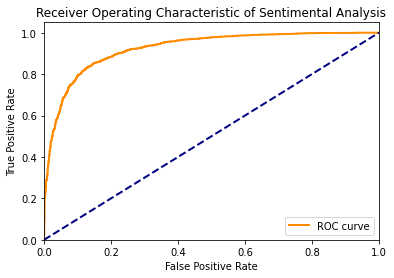

K-Fold Cross Validation   :0.7386414114187698


In [135]:
y_scores = mnb.predict_proba(x_test)
y_test = np.array(list(y_test))

crossval = cross_val_score(mnb, text_count_matrix, y, cv = KFold(n_splits=10))
print(f'ROC Area Under Curve Score:{roc_auc_score(y_test, y_scores[:,1])}')

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve"
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic of Sentimental Analysis")
plt.legend(loc="lower right")
plt.show()

print(f'K-Fold Cross Validation   :{crossval.mean()}')

From the resulting mean K-Fold Cross Validation score, one is able to tell that the amount of data can help increase the accuracy of the model itself.

### Sources:

1. Chaudhury, Srijani. “Building a Sentiment Analyzer with Naive Bayes.” The Startup, 24 Nov. 2020, medium.com/swlh/building-a-sentiment-analyzer-with-naive-bayes-c96cc8aa52a5. Accessed 10 Feb. 2022.
2. Google. “Classification: ROC Curve and AUC  |  Machine Learning Crash Course.” Google Developers, 2019, developers.google.com/machine-learning/crash-course/classification/roc-and-auc.
3. “K-Fold Cross-Validation in Python Using SKLearn - AskPython.” AskPython, 12 Nov. 2020, www.askpython.com/python/examples/k-fold-cross-validation.
4. “Receiver Operating Characteristic (ROC).” Scikit-Learn, scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html. Accessed 10 Feb. 2022.
5. SciKit-Learn. “3.1. Cross-Validation: Evaluating Estimator Performance — Scikit-Learn 0.21.3 Documentation.” Scikit-Learn.org, 2009, scikit-learn.org/stable/modules/cross_validation.html.
6. Terribile, Matthew. “Understanding Cross Validation’s Purpose.” Medium, 29 July 2017, medium.com/@mtterribile/understanding-cross-validations-purpose-53490faf6a86.